Python 2. Don't run this code
### Содержание
    1. TextsClusteringExample  
    3. sklearn.data_visualization  
    4. gensim  


# Week 1 - TextsClusteringExample
# Пример: кластеризация текстов

## Выборка

In [2]:
from sklearn.datasets import fetch_20newsgroups

train_all = fetch_20newsgroups(subset='train')
print train_all.target_names
# кластеризация писем на разные темы

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [3]:
# берем три сильно отличающиеся темы: макбуки, христианство, хоккей
# готовим датасет
simple_dataset = fetch_20newsgroups(
    subset='train', 
    categories=['comp.sys.mac.hardware', 'soc.religion.christian', 'rec.sport.hockey'])

In [4]:
# смотрим что у него внутри
print simple_dataset.data[0]
# письмо вроде действительно про мак

From: erik@cheshire.oxy.edu (Erik Adams)
Subject: HELP!!  My Macintosh "luggable" has lines on its screen!
Organization: Occidental College, Los Angeles, CA 90041 USA.
Distribution: comp
Lines: 20

Okay, I don't use it very much, but I would like for it to keep working
correctly, at least as long as Apple continues to make System software
that will run on it, if slowly :-)

Here is the problem:  When the screen is tilted too far back, vertical
lines appear on the screen.  They are every 10 pixels or so, and seem
to be affected somewhat by opening windows and pulling down menus.
It looks to a semi-technical person like there is a loose connection
between the screen and the rest of the computer.

I am open to suggestions that do not involve buying a new computer,
or taking this one to the shop.  I would also like to not have
to buy one of Larry Pina's books.  I like Larry, but I'm not sure
I feel strongly enough about the computer to buy a service manual
for it.

On a related note:  what

In [5]:
# посмотрим на другие классы. 
simple_dataset.target
# Все классы отображаются 0,1,2 

array([0, 0, 1, ..., 0, 1, 2], dtype=int64)

In [6]:
# попробуем понять что значат цифры
# у последнего элемента класс 2
print simple_dataset.data[-1]
# скорее всего про христианство

From: dlecoint@garnet.acns.fsu.edu (Darius_Lecointe)
Subject: Re: Sabbath Admissions 5of5
Organization: Florida State University
Lines: 21

I find it interesting that cls never answered any of the questions posed. 
Then he goes on the make statements which make me shudder.  He has
established a two-tiered God.  One set of rules for the Jews (his people)
and another set for the saved Gentiles (his people).  Why would God
discriminate?  Does the Jew who accepts Jesus now have to live under the
Gentile rules.

God has one set of rules for all his people.  Paul was never against the
law.  In fact he says repeatedly that faith establishes rather that annuls
the law.  Paul's point is germane to both Jews and Greeks.  The Law can
never be used as an instrument of salvation.  And please do not combine
the ceremonial and moral laws in one.

In Matt 5:14-19 Christ plainly says what He came to do and you say He was
only saying that for the Jews's benefit.  Your Christ must be a
politician, speaki

In [7]:
# у предпоследнего класс 1
print simple_dataset.data[-2]
# чтото из НАСА но переписка про хоккей

From: scialdone@nssdca.gsfc.nasa.gov (John Scialdone)
Subject: CUT Vukota and Pilon!!!
News-Software: VAX/VMS VNEWS 1.41    
Organization: NASA - Goddard Space Flight Center
Lines: 32

I have been to all 3 Isles/Caps tilts at the Crap Centre this year, all Isles
wins and there is no justification for Vukota and Pilon to play for the Isles.
Vukota is absolutely the worst puck handler in the world!! He couldn't hit a
bull in the ass with a banjo!! Al must remember a few years back when Mick 
scored 3 goals in one period against the Caps in a 5-3 Isles win. I was there
and was astonished as was the rest of the crowd. Wake-up Al!!! Years later he's
gotten worse. He's a cheap shot artist and always ends up getting
stupid/senseless penalties. I think he would make a good police officier!!!

As for Pilon, he can't carry the puck out to center ice by himself. He either
makes a bad pass resulting in a turnover, or he attempts to bring the puck 
towards the neutral zone and skates right into an 

In [8]:
# посмотрим сколько объектов в выборке
print len(simple_dataset.data)

1777


## Признаки

In [22]:
# для начала просто частоты слов
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=500, min_df=10)
# vectorizer = CountVectorizer(max_df=500, min_df=10) # в первом примере
# vectorizer = TfidfVectorizer(max_df=500, min_df=100) # в третьем
# vectorizer = TfidfVectorizer(max_df=1000, min_df=100) # в четвертом
matrix = vectorizer.fit_transform(simple_dataset.data)

In [23]:
# посмотрим на нашу матрицу
print matrix.shape
# 1777 на 3767. Так вышло т.к. мы задали пороги для максимальной документной
# частоты слов и для минимальной (max_df и min_df). Т.е. мы не хотели 
# видеть слова, которые встречаются больше чем в 500 документах, для того
# чтобы както более менее удобно различать разные кластеры
# Наверняка во всех кластерах есть слова типа from, subject и тд. С другой
# стороны мы не хотели смотреть на слишком редкие слова, чтобы не была
# слишком большая матрица.

(1777, 3767)


## Аггломеративная кластеризация (neighbour joining)
потому что в ней мы можем задать используемую метрику или функцию близости, в частности использовать косинусную меру, которая обычно неплохо подходит для текстов

In [24]:
from sklearn.cluster.hierarchical import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=3, affinity='cosine', linkage='complete')
# перед тем как делать fit_predict мы преобразуем матрицу к другому формату
# т.к. матрица после извлечения признаков получится в разреженном формате
# и в таком формате с ней работать удобнее, ведь в ней много нулей. 
# Зачем нам хранить все эти нули, если можно хранить только значения 
# в тех местах где не ноль. Но реализация алгоритма не поддерживает
# разреженные матрицы и поэтому приходится приводить к плотному виду и,
# естественно, расходовать много памяти 
preds = model.fit_predict(matrix.toarray())

In [25]:
print list(preds)
# почти везде 0, небольшие вкрапления 1 и 2

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [26]:
# может быть, мы допустили ошибку, когда строили признаки. Может стоит
# посмотреть на конкретные письма, конкретные признаки и проверить, 
# что все работает правильно. Посмотрим на нулевой объект из выборки.
print matrix[0]
# на видео он первый а у меня последний почему то

  (0, 1246)	0.3906389385132699
  (0, 239)	0.09501028877632492
  (0, 1659)	0.07226670936760915
  (0, 2082)	0.09656717763921
  (0, 1846)	0.06741426312477893
  (0, 2991)	0.3895610830528872
  (0, 810)	0.0809427637021726
  (0, 2056)	0.09616720743610424
  (0, 319)	0.10054935380579341
  (0, 625)	0.05207173909126517
  (0, 3553)	0.07346689959490565
  (0, 1121)	0.06442816229222373
  (0, 838)	0.10154477899829951
  (0, 69)	0.06858267052730141
  (0, 2413)	0.10258878033617379
  (0, 3555)	0.06229087987706688
  (0, 3600)	0.05737015279917228
  (0, 2273)	0.057960021837659234
  (0, 1905)	0.08173536478989506
  (0, 3722)	0.09501028877632492
  (0, 926)	0.11742059318548873
  (0, 1991)	0.0711302768586001
  (0, 2048)	0.07488448956033757
  (0, 354)	0.06947437383545055
  (0, 900)	0.12357635170024021
  :	:
  (0, 2868)	0.08596208970791505
  (0, 855)	0.20162554088271673
  (0, 301)	0.055632566960467825
  (0, 2422)	0.09427236106959615
  (0, 3285)	0.11264581593118286
  (0, 1831)	0.1250526461821779
  (0, 620)	0.1118065

In [27]:
# посмотри какие признаки у нас есть в принципе
vectorizer.get_feature_names()
# слова и всякий мусор, непонятно мешает ли он

[u'00',
 u'000',
 u'01',
 u'02',
 u'03',
 u'030',
 u'0358',
 u'04',
 u'040',
 u'05',
 u'06',
 u'07',
 u'08',
 u'09',
 u'10',
 u'100',
 u'1000',
 u'101',
 u'102',
 u'104',
 u'105',
 u'106',
 u'109',
 u'11',
 u'110',
 u'112',
 u'113',
 u'119',
 u'12',
 u'120',
 u'126',
 u'127',
 u'128',
 u'129',
 u'13',
 u'132',
 u'133',
 u'14',
 u'140',
 u'15',
 u'150',
 u'152',
 u'16',
 u'160',
 u'17',
 u'170',
 u'175',
 u'18',
 u'180',
 u'19',
 u'1987',
 u'1988',
 u'1989',
 u'199',
 u'1990',
 u'1991',
 u'1992',
 u'1993',
 u'1993apr14',
 u'1993apr15',
 u'1993apr16',
 u'1993apr18',
 u'1993apr19',
 u'1993apr20',
 u'1993apr5',
 u'1993apr6',
 u'1d17',
 u'1d20',
 u'1st',
 u'20',
 u'200',
 u'2000',
 u'203',
 u'21',
 u'210',
 u'22',
 u'23',
 u'230',
 u'24',
 u'240',
 u'241',
 u'25',
 u'253',
 u'256',
 u'25mhz',
 u'26',
 u'27',
 u'28',
 u'286',
 u'29',
 u'2nd',
 u'30',
 u'300',
 u'30602',
 u'31',
 u'32',
 u'33',
 u'34',
 u'35',
 u'36',
 u'37',
 u'38',
 u'386',
 u'39',
 u'3rd',
 u'40',
 u'400',
 u'403',
 u'408'

In [28]:
vectorizer.get_feature_names()[877]

u'connect'

In [29]:
simple_dataset.data[0]
# видимо много шума и нужно его отфильтровать

u'From: erik@cheshire.oxy.edu (Erik Adams)\nSubject: HELP!!  My Macintosh "luggable" has lines on its screen!\nOrganization: Occidental College, Los Angeles, CA 90041 USA.\nDistribution: comp\nLines: 20\n\nOkay, I don\'t use it very much, but I would like for it to keep working\ncorrectly, at least as long as Apple continues to make System software\nthat will run on it, if slowly :-)\n\nHere is the problem:  When the screen is tilted too far back, vertical\nlines appear on the screen.  They are every 10 pixels or so, and seem\nto be affected somewhat by opening windows and pulling down menus.\nIt looks to a semi-technical person like there is a loose connection\nbetween the screen and the rest of the computer.\n\nI am open to suggestions that do not involve buying a new computer,\nor taking this one to the shop.  I would also like to not have\nto buy one of Larry Pina\'s books.  I like Larry, but I\'m not sure\nI feel strongly enough about the computer to buy a service manual\nfor it.\

## KMeans
отфильтруем методом к-средних

In [30]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=1)
# задали три кластера и рандом стэйт для воспроизводимости рез-тов
preds = model.fit_predict(matrix.toarray())
print preds

[0 0 2 ... 0 2 1]


In [31]:
# сравним
print simple_dataset.target
# нули на том же месте а вместо 2 хотелось бы поставить 1. Т.е. просто
# поменялись местами 1 и 2. Но в целом похоже на правду

[0 0 1 ... 0 1 2]


In [32]:
# поменяем их местами и посмотрим в какой доле случаев мы ошибаемся
mapping = {2 : 1, 1: 2, 0: 0}
mapped_preds = [mapping[pred] for pred in preds]
print float(sum(mapped_preds != simple_dataset.target)) / len(simple_dataset.target)
# всего 4 процента ошибок, следовательно правильных почти 96%.
# Очень хорошо

0.0472706809229


In [35]:
# сравним с классификатором
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
clf = LogisticRegression()
print cross_val_score(clf, matrix, simple_dataset.target).mean()
# у классификатора точность 98 процентов
# выбора простая и результаты очень близкие

C:\Users\User\Anaconda3_5.2.0\envs\Python2.7\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\User\Anaconda3_5.2.0\envs\Python2.7\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3_5.2.0\envs\Python2.7\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9853603185880773


## Более сложная выборка

In [36]:
# теперь берем 3 темы близкие друг к другу. Все про компьютеры
dataset = fetch_20newsgroups(
    subset='train', 
    categories=['comp.sys.mac.hardware', 'comp.os.ms-windows.misc', 'comp.graphics'])

In [39]:
# делаем Ксредних. Здесь ему будет сложнее
matrix = vectorizer.fit_transform(dataset.data)
model = KMeans(n_clusters=3, random_state=42)
preds = model.fit_predict(matrix.toarray())
print preds
print dataset.target

[2 1 0 ... 2 0 2]
[2 1 1 ... 2 0 2]


In [40]:
# mapping = {2 : 0, 1: 1, 0: 2} # было в исходном но у меня почему то 
# сразу встали с правильными цифрами
mapping = {2 : 2, 1: 1, 0: 0}
mapped_preds = [mapping[pred] for pred in preds]
print float(sum(mapped_preds != dataset.target)) / len(dataset.target)
# 23% ошибок что тоже неплохо. Потому что у нас не два кластера а три
# Самое главное что алгоритм кластеризации не знает, по какому принципу
# мы делим тексты на группы, ведь этом можно сделать кучей разных способов
# если мы хотим както передать это знание нашему алгоритму кластеризации,
# нужно просто правильным образом выбирать признаки. Оказывается, 
# те признаки, котормы мы выбрали достаточно близки к тому что нам нужно.

0.232173416999


In [41]:
# Посмотрим на качество классификатора
clf = LogisticRegression()
print cross_val_score(clf, matrix, dataset.target).mean()
# почти 92%, но оказывается что его можно немного улучшить, ведь сейчас 
# много признаков, можно их уменьшить сингулярным разложением матриц SVD

0.917279226713189


## SVD + KMeans

In [42]:
# Оставим всего 1000 признаков
from sklearn.decomposition import TruncatedSVD

model = KMeans(n_clusters=3, random_state=42)
svd = TruncatedSVD(n_components=1000, random_state=123)
features = svd.fit_transform(matrix)
preds = model.fit_predict(features)
print preds
print dataset.target

[0 2 1 ... 0 1 0]
[2 1 1 ... 2 0 2]


In [43]:
# После этого надо будет както сопоставить полученные кластеры с правильными
# и снова посмотреть качество
mapping = {0 : 2, 1: 0, 2: 1}
mapped_preds = [mapping[pred] for pred in preds]
print float(sum(mapped_preds != dataset.target)) / len(dataset.target)
# качество стало 20% ошбиок всего

0.206503137479


In [44]:
# попробуем оставить не 1000 компонент а 200
model = KMeans(n_clusters=3, random_state=42)
svd = TruncatedSVD(n_components=200, random_state=123)
features = svd.fit_transform(matrix)
preds = model.fit_predict(features)
print preds
print dataset.target

[2 0 1 ... 2 1 2]
[2 1 1 ... 2 0 2]


In [45]:
import itertools
# функция выводит все результаты в зависимости от разных перестановок
# то есть мы можем отображать двойку в некоторую переменную а, единичку в b
# нолик в С. Здесь мы перебираем все возможные перестановки нолика, единицы
# и двойки и выводи результаты
def validate_with_mappings(preds, target, dataset):
    permutations = itertools.permutations([0, 1, 2])
    for a, b, c in permutations:
        mapping = {2 : a, 1: b, 0: c}
        mapped_preds = [mapping[pred] for pred in preds]
        print float(sum(mapped_preds != target)) / len(target)
        
validate_with_mappings(preds, dataset.target, dataset)
# Самая лучшая перестановка дает опять таки 20% ошибок.
# То есть оставив всего 200 признаков из более чем 3к мы сохранили качество
# Но здесь просто повезло с random_state

0.900741585853
0.674272675414
0.705647461495
0.893896177981
0.205362236167
0.620079863092


In [46]:
model = KMeans(n_clusters=3, random_state=42)
svd = TruncatedSVD(n_components=200, random_state=321)
features = svd.fit_transform(matrix)
preds = model.fit_predict(features)
print preds
print dataset.target
validate_with_mappings(preds, dataset.target, dataset)
# Ну вот, здесь лучший уже 26%

[2 1 0 ... 2 0 2]
[2 1 1 ... 2 0 2]
0.713063320023
0.845407872219
0.889332572732
0.70051340559
0.586423274387
0.265259555048


## Итоги

1. Получили интерпретируемый результат на обеих выборках
1. Реальность, однако, намного более жестока
1. Попробовали использовать AgglomerativeClustering и KMeans

# Week 4 - gensim
# Sklearn

# Визуализация данных

In [1]:
from sklearn import datasets

import numpy as np

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Загрузка выборки
написанные от руки цифры

In [3]:
digits  =  datasets.load_digits()

In [4]:
print digits.DESCR
# набор - изображение цифр 5620 штук, Каждая цифра - вектор из 64 цифр 
# (яркость пикселя в данной точке). изображение - прямоугольник 8 на 8. 
# пропущенных значений нет. 

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each bloc

In [5]:
print 'target:', digits.target[0]
print 'features: \n', digits.data[0] 
print 'number of features:', len(digits.data[0])
# посмотрим, как же выглядят данные и как представлены целевые метки. 
# первый объект, у него целевая метка 0 — означает, что это рукописная 
# цифра 0, и видим набор его признаков. Вектор длиной 64 числа 
# в диапазоне от 0 до 16. 

target: 0
features: 
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
number of features: 64


## Визуализация объектов выборки

In [7]:
digits.data[0].shape
# Видим, что размерность 64 и 0. Фактически передаем в данную функцию
# не матрицу, а вектор и не понятно, как этот вектор отобразить. 

(64L,)

In [8]:
# В ndarray есть функция reshape чтобы изменить размерность вектора. 
# Заменим строку длиной 64 на матрицу длиной 8 на 8. 
# Для этого вызовем метод reshape с параметрами 8 и 8.
# Данные не изменились, но теперь это не вектор, а матрица, 
# в этом виде можно попробовать нарисовать.
print digits.data[0].reshape(8,8)

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [9]:
# Проверим размерность
digits.data[0].reshape(8,8).shape

(8L, 8L)

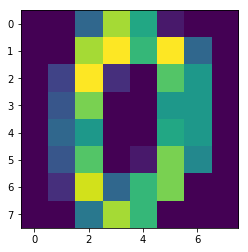

In [10]:
pylab.imshow(digits.data[0].reshape(8,8))
# Теперь получилось - рукописная цифра, и мы знаем, что это 0. 

In [11]:
# создатели dataset позаботились, чтобы было удобно отображать цифры и 
# не делать каждый раз reshape. Посмотрим на все эти атрибуты, которые
# предоставляет dataset.  
print digits.keys()
# Помимо данных, целевой переменной, имен классов и описаний, у нас есть 
# еще ключ images. 

['images', 'data', 'target_names', 'DESCR', 'target']


In [12]:
# Посмотрим, что это такое.
print digits.images[0]
# это то же самое описание объекта, но уже не в виде вектора, 
# а в виде матрицы. 

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


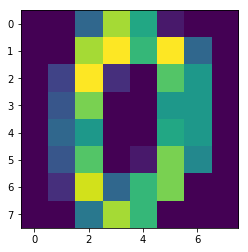

In [13]:
# отрисуем, используя images вместо data.
pylab.imshow(digits.images[0])
# получаем ту же самую картинку, даже не нужно делать reshape

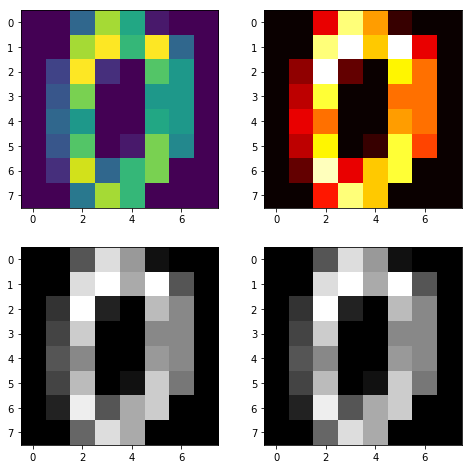

In [14]:
# Поменяем вид. Возможно, в таком виде не очень видно, что это 0. 
# Изображение яркое, разноцветное. Можно влиять на изображение. Например,
# выбрать colormap hot или gray (чб). 
pyplot.figure(figsize(8, 8))

pyplot.subplot(2, 2, 1)
pylab.imshow(digits.images[0])

pyplot.subplot(2, 2, 2)
pylab.imshow(digits.images[0], cmap = 'hot')

pyplot.subplot(2, 2, 3)
pylab.imshow(digits.images[0], cmap = 'gray')

pyplot.subplot(2, 2, 4)
pylab.imshow(digits.images[0], cmap = 'gray', interpolation = 'nearest')
# interpolation - параметр, отвечает как будут выглядеть границы пикселей 
# на изображении. Рассмотрим 4 разных варианта. 

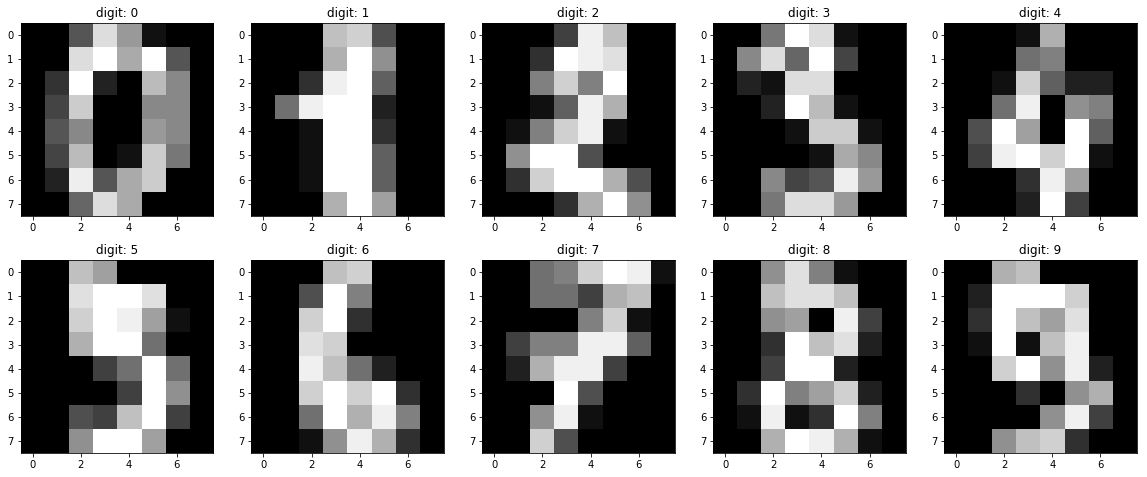

In [15]:
# в чб отрисуем все цифры. Посмотрим, легко ли их узнать глазами. 
# Отрисуем первые 10 объектов из dataset при помощи subplot, будем
# надеяться, что это разные цифры. 
pyplot.figure(figsize(20, 8))

for plot_number, plot in enumerate(digits.images[:10]):
    pyplot.subplot(2, 5, plot_number + 1)
    pylab.imshow(plot, cmap = 'gray')
    pylab.title('digit: ' + str(digits.target[plot_number]))
# видим изображение цифр от 0 до 9, невооруженным взглядом их можно узнать. 
# Это дает следующее предположение: если цифры можно неплохо узнать, их 
# начертание отличается, то можно решать задачи классификации более-менее 
# успешно. Из предыдущих лекций известно, что представление цифр в виде 64 
# признаков является избыточным.     

## Уменьшение размерности

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

from collections import  Counter

In [17]:
# Для того чтобы успешно отличать эти цифры друг от друга, достаточно 
# гораздо меньшей размерности данных. Попробуем сначала уменьшить 
# размерность данных теми методами, которые изучали, и посмотрим, как это 
# сказывается на качестве классификации. 
# Для начала: отрежем небольшую подвыборку из нашей выборки данных и будем 
# работать с ними. Это нужно для того, чтобы все команды, работало быстрее. 
# Возьмем первую тысячу. 
data = digits.data[:1000]
labels = digits.target[:1000]

In [18]:
print Counter(labels)
# Получилась сбалансированная выборка - все объекты встречаются 
# приблизительно в одинаковой пропорции, объекты всех классов. С помощью 
# Counter увидим, что каждый объект встречается приблизительно 100 раз. 

Counter({3: 104, 1: 102, 6: 101, 2: 100, 5: 100, 0: 99, 7: 99, 9: 99, 4: 98, 8: 98})


<BarContainer object of 10 artists>

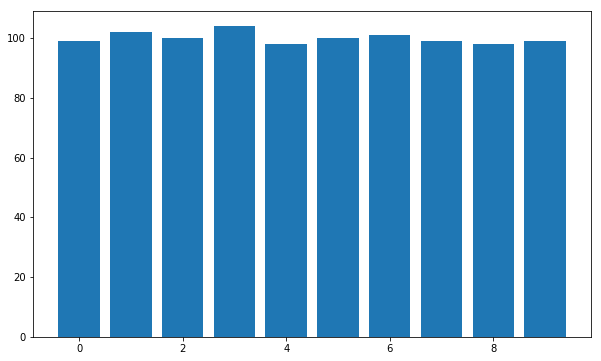

In [19]:
# Для наглядности можно нарисовать гистограмму. 
pylab.figure(figsize = (10, 6))
pylab.bar(Counter(labels).keys(), Counter(labels).values())
# Все объекты встречаются одинаковое количество раз. 

In [20]:
# Построим некоторый классификатор. Мы хотим смотреть, как наши объекты 
# отображаются на плоскости => метрический классификатор (работает на основе 
# близости объектов). Выбираем классификатор K ближайших соседей. 
classifier = KNeighborsClassifier()

In [21]:
# Сделаем следующее - обучим его на всей выборке, на всех тех 1000 цифрах, 
# которые мы выбрали, и посмотрим качество, что скажет о том, насколько  
# объекты легко классифицировать по их изображениям. 
classifier.fit(data, labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [22]:
# качество классификации оценим через classification_report он дает сводку 
# о точности, полноте f1 для каждого класса (классов здесь ровно 10), 
# а также дает усредненные оценки. 
print classification_report(classifier.predict(data), labels)
# В среднем правильно классифицируем практически всю выборку. Здесь 
# классификация производится по 5 ближайшим соседям и можно сказать, что 
# большинство объектов находятся в окружении объектов из своего класса. Это 
# говорит о том, что наши изображения  похожи друг на друга, начертания 
# похожи, и на основе изображений мы можем решать эту задачу. 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      0.97      0.99       105
           2       1.00      1.00      1.00       100
           3       1.00      0.98      0.99       106
           4       1.00      1.00      1.00        98
           5       0.99      1.00      0.99        99
           6       1.00      1.00      1.00       101
           7       0.99      0.99      0.99        99
           8       0.97      0.99      0.98        96
           9       0.96      0.98      0.97        97

   micro avg       0.99      0.99      0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



При переходе в пространство меньшей размерности (=2), остается ли это условие в силе. То есть в новом пространстве будут ли цифры так же находятся близко друг к другу или уже нет, или уже в ближайшем окружении начнутся встречаться объекты чужих классов, и тогда наше качество классификации уменьшится. Вот давайте на это посмотрим. Начнем с линейных методов понижения размерности. Первый метод, который мы рассмотрим, — это случайные проекции. 
### Random projection

In [23]:
from sklearn import random_projection

In [24]:
# Для начала нам нужно построить наши преобразования с помощью 
# random_projection. Строим объект SparseRandomProjection и передаем ему  
# аргументы: n_components — это количество новых компонент, которые нас 
# интересуют. Мы хотим строить изображение наших объектов, поэтому нам 
# удобно работать с двумя компонентами. И зададим random_state. 
# После того, как наш объект построен, нужно это отображение обучить на 
# исходных данных и применить, то есть получить данные в новой размерности. 
# Сделаем с помощью метода fit_predict. 
projection = random_projection.SparseRandomProjection(n_components = 2,
                                                      random_state = 0)
data_2d_rp = projection.fit_transform(data)
# новое представление о данных готово

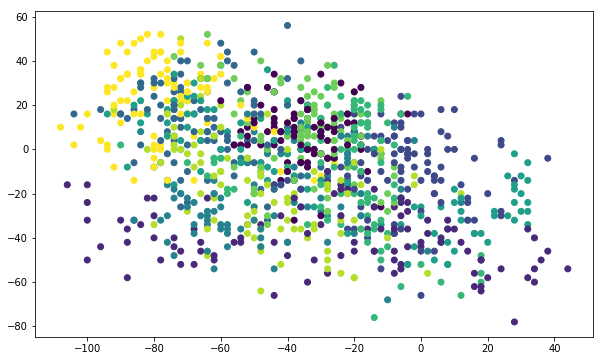

In [25]:
# теперь изобразим его на плоскости. 
pylab.figure(figsize=(10, 6))
pylab.scatter(data_2d_rp[:, 0], data_2d_rp[:, 1], c = labels)
# Видим набор точек, где разными цветами отображены объекты разных классов,
# то есть разными цветами у нас отображены разные цифры. Они довольно сильно
# перемешены и так вот на глаз не очевидно, в какой области нужно ожидать
# встретить какую цифру. 

In [27]:
# На глаз оценивать такие вещи плохо, попробуем обучить классификатор. Снова 
# обучим ту же самую модель knn и сравним, насколько изменилось качество. 
# Посмотрим для скольких объектов в ближайшем окружении вновь находятся 
# объекты того же самого класса. Для этого оцениваем качество на обучающей 
# выборке
classifier.fit(data_2d_rp, labels)
print classification_report(classifier.predict(data_2d_rp), labels)
# качество в среднем упало до 50 %, то есть для половины объектов ближайшие 
# 5 соседей уже могут быть числами из разных классов. 

              precision    recall  f1-score   support

           0       0.74      0.47      0.58       154
           1       0.75      0.58      0.65       131
           2       0.67      0.59      0.63       113
           3       0.71      0.51      0.60       144
           4       0.38      0.56      0.45        66
           5       0.42      0.53      0.47        79
           6       0.52      0.57      0.55        93
           7       0.35      0.51      0.42        69
           8       0.37      0.58      0.45        62
           9       0.62      0.69      0.65        89

   micro avg       0.55      0.55      0.55      1000
   macro avg       0.55      0.56      0.54      1000
weighted avg       0.60      0.55      0.56      1000



### PCA (метод главных компонент)

In [29]:
# from sklearn.decomposition import RandomizedPCA
from sklearn.decomposition import PCA

In [31]:
# построим преобразование, в качестве результата получим представление 
# объектов в двумерном пространстве. Снова применяем метод fit_predict, 
# вернее fit_transform, и смотрим на наше изображение 
pca = PCA(n_components = 2, random_state = 0)
data_2d_pca = pca.fit_transform(data)

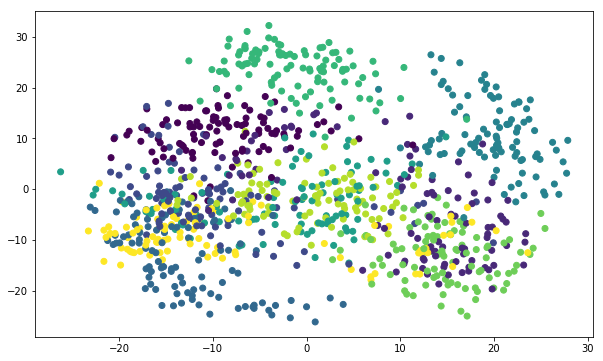

In [32]:
pylab.figure(figsize = (10, 6))
pylab.scatter(data_2d_pca[:, 0], data_2d_pca[:, 1], c = labels)
# Видим, что, ну на глаз изображение кажется более качественным. У нас явно 
# появились области разных цветов, то есть мы видим, что для некоторых 
# классов получается отделить их от других. Получается сделать так, чтобы 
# объекты этих классов были рядом друг с другом. 

In [33]:
# Теперь давайте оценим это с помощью классификатора. Считаем качество.
classifier.fit(data_2d_pca, labels)
print classification_report(classifier.predict(data_2d_pca), labels)
# в среднем качество уже лучше, чем для предыдущего случая. Аккуратность 
# 0,7, то есть 70 % объектов мы все еще можем классифицировать. Представьте 
# себе, как здорово — мы уменьшили размерность в 32 раза, вместо 64 
# признаков у нас теперь всего 2, и тем не менее, мы получаем довольно 
# высокое качество классификации

              precision    recall  f1-score   support

           0       0.83      0.73      0.77       113
           1       0.56      0.54      0.55       105
           2       0.59      0.57      0.58       104
           3       0.77      0.79      0.78       101
           4       0.95      0.93      0.94       100
           5       0.56      0.54      0.55       104
           6       0.92      0.93      0.93       100
           7       0.76      0.71      0.74       105
           8       0.62      0.66      0.64        92
           9       0.52      0.67      0.58        76

   micro avg       0.71      0.71      0.71      1000
   macro avg       0.71      0.71      0.71      1000
weighted avg       0.71      0.71      0.71      1000



Перейдем к нелинейным методам. Кажется, что нелинейные методы должны работать получше.
### MDS (multidimensional scaling - многомерное шкалирование)

In [34]:
from sklearn import manifold

In [35]:
# Построим следующий объект: будем уменьшать размерность до 2 компонент и 
# задачу оптимизации будем решать не более чем за 100 итераций. Строим 
# обновленные данные, делаем это с помощью метода fit_transform.
mds = manifold.MDS(n_components = 2, n_init = 1, max_iter = 100)
data_2d_mds = mds.fit_transform(data)

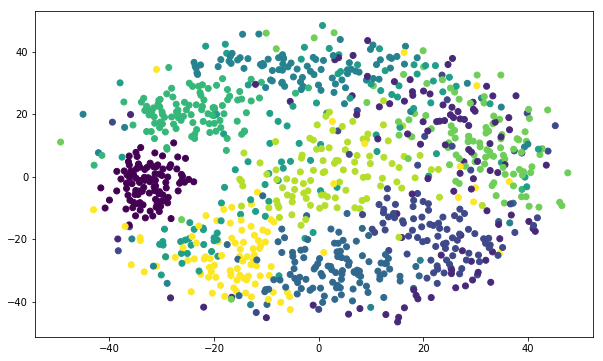

In [36]:
# Отобразим изображение. 
pylab.figure(figsize=(10, 6))
pylab.scatter(data_2d_mds[:, 0], data_2d_mds[:, 1], c = labels)
# Вновь мы можем отличить группы объектов. 

In [37]:
# Получим оценку на основе классификации.
classifier.fit(data_2d_mds, labels)
print classification_report(classifier.predict(data_2d_mds), labels)
# видим, что качество примерно такое же, но немного больше. Метод  неплохо 
# работает. 

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       105
           1       0.56      0.61      0.58        94
           2       0.74      0.79      0.76        94
           3       0.88      0.88      0.88       103
           4       0.83      0.73      0.78       111
           5       0.43      0.58      0.49        74
           6       0.92      0.91      0.92       102
           7       0.76      0.65      0.70       116
           8       0.85      0.77      0.81       108
           9       0.70      0.74      0.72        93

   micro avg       0.76      0.76      0.76      1000
   macro avg       0.76      0.76      0.76      1000
weighted avg       0.78      0.76      0.77      1000



### t- SNE

In [38]:
# создадим наш объект-преобразователь, основу оставим для компонента, 
# инициализировать преобразование будем с помощью PCA. 
# Другой вариант — делать это с помощью случайной инициализации (random). 
# Получим преобразование данных с помощью метода fit_transform. 
tsne = manifold.TSNE(n_components = 2, init = 'pca', random_state = 0)
data_2d_tsne = tsne.fit_transform(data)

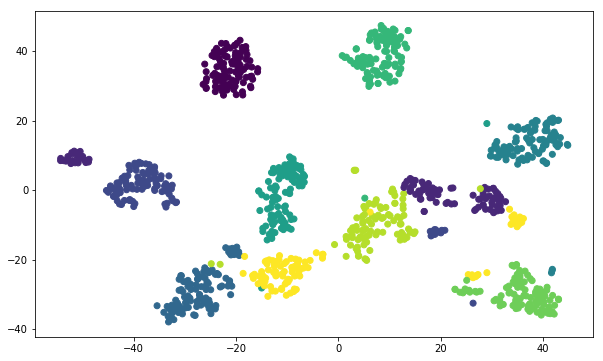

In [39]:
# Построим изображение. 
pylab.figure(figsize = (10, 6))
pylab.scatter(data_2d_tsne[:, 0], data_2d_tsne[:, 1], c = labels)
# Видим, что получается лучшая картинка. Здесь очень легко убедиться в том, 
# что объекты разных цветов или объекты разных классов находятся довольно 
# далеко друг от друга. 

In [40]:
# Кажется, что если мы будем решать задачу классификации в таких признаках, 
# то мы должны получить довольно высокое качество. Может быть, даже 
# сравнимое с изначальным, с данными в изначальном пространстве. Проверим 
# это. Снова обучим классификатор ближайших соседей
classifier.fit(data_2d_tsne, labels)
print classification_report(classifier.predict(data_2d_tsne), labels)
# Качество в среднем равняется 0,99 по метрике accuracy

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      0.98      0.99       104
           2       0.99      1.00      0.99        99
           3       1.00      0.97      0.99       107
           4       1.00      0.99      0.99        99
           5       0.98      1.00      0.99        98
           6       0.99      1.00      1.00       100
           7       0.99      0.99      0.99        99
           8       0.96      0.98      0.97        96
           9       0.98      0.98      0.98        99

   micro avg       0.99      0.99      0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



# Пример использования библиотеки gensim для тематического моделирования

Такая полезная теорема Байеса! :)

![comic1](http://imgs.xkcd.com/comics/seashell.png)

In [1]:
from gensim import corpora, models
# corpora для импорта данных а моделс для настройки модели

C:\Users\User\Anaconda3_5.2.0\envs\Python2.7\lib\site-packages\smart_open\ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')
C:\Users\User\Anaconda3_5.2.0\envs\Python2.7\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


Импортируем данные в формте UCI Bag of Words, он позволяет максимально  сжато представить разреженную матрицу частот слов dataset состоит из текстовых описаний к комиксам xkcd. Здесь указаны  ссылки на комиксы и текстовые описания того, что на них изображено.  из этих текстов удалили всю пунктуацию и выполнили лимитизацию, то есть  приведение каждого слова к начальной форме. В итоге - матрица частот слов (docword.xkcd.txt). В первой строке - количество документов,  во второй — количество слов, в третьей — общее количество слов  во всех документах коллекции. Дальше в каждой строке идёт три числа —  это номер документа, номер слова и количество, сколько раз это слово  встретилось в документе. Нумерация и документов, и слов здесь с единицы  тексты здесь во втором файле, который обязательно должен идти рядом  с первым. Это файл-словарь. Здесь в каждой строке с номером I записано слово, которое отвечает этому индексу. То есть, например, под индексом 1 у нас идёт слово boy. 

In [2]:
# импортируем эти файлы в нашу модель. Для этого создадим объект класса
# UciCorpus и укажем путь к двум нашим файлам.
data = corpora.UciCorpus("docword.xkcd.txt", "vocab.xkcd.txt")
# Также gensim требует, чтобы мы в отдельную переменную обязательно
# сохранили словарь. Это можно сделать с помощью метода create_dictionary
# у объекта data, который мы получили в первой строке.
dictionary = data.create_dictionary()

Первый параметр — corpus, у нас он хранится в переменной data. Второй параметр -  id2word (необязателен, но желательно указать) это отображение индексов слов непосредственно в слова. У нас это dictionary, который мы
создали ранее. Далее параметры, которые влияют на обучение модели. Если коллекция небольшая, то можно сделать много проходов по коллекции. Если же коллекция большая («википедия»), то двадцать проходов будет очень долго. Можно указывать один или два прохода, но нужно подобрать аккуратно другие параметры, влияющие на сходимость алгоритмов. Особенно это параметры decay и offset (самостоятельно). Кроме того, полезно указывать параметр  distributed (например true), тогда можно обучать модель сразу в нескольких параллельных процессах. Ещё два важных параметра модели — это alpha и eta. Они создают априорные параметры распределения Дирихле, точнее, параметры  априорного распределения Дирихле для моделей (см лекции).  Распределение Дирихле — это распределение над векторами, и параметр для него — это тоже вектор. Если в этом векторе параметра все числа одинаковые, то это симметричные распределения Дирихле, если разные —  то асимметричные. Gensim поддерживает разные варианты. Можно подавать одно число, тогда gensim повторит его несколько раз, оставит вектор,  и это будет симметричный prayer. Можно подавать вектор любой, можно подавать строку — symmetric или asymmetric, тогда gensim как-то сам установит эти параметры, исходя из своих каких соображений, но не факт, что эти значения будут оптимальными. Также можно указывать auto, тогда gensim подберёт оптимальное значение асимметричного природного распределения, но при этом модель будет обучаться несколько дольше. На практике достаточно попробовать просто числа с каким-то шагом в интервале от 0 до 2 и выбрать те, при которых модель получается наиболее интерпретируемой. 
Это сделано до демонстрации и подобраны alpha и eta, равными 1.25. Модели lda требуется несколько минут для обучения.

In [6]:
# Загрузка модели
ldamodel = models.ldamodel.LdaModel.load("ldamodel_xkcd")

Стоит отметить, что, даже если уже зафиксировали все параметры, построенная модель будет очень зависеть от начального приближения, потому что изначально все параметры в модели инициализируются какими-то случайными числами. Поэтому каждый раз, если вам позволяет размер коллекции и ваше время, стоит построить модель несколько раз и выбрать ту, в которой темы лучше всего. 
Понять, какие темы хорошие или плохие можно, посмотрев на «топы» слов. Их можно вывести через print_topics, указав, сколько тем вы хотите посмотреть и сколько слов вывести в каждой теме. Лексика в комиксах xkcd достаточно специфичная, и особенно русскоговорящему человеку не всегда понятная. Поэтому давайте скопируем наши темы в яндекс-переводчик и посмотрим переводы этих слов. Мы видим, что в первых двух темах много имён, и не очень понятно, о чём эти темы. Третья тема посвящена комиксам в таком стиле: там любят рисовать график, и этот график как-то связан со временем, и идёт какой-то сопровождающий текст. Потом говорят слова: «рисунок», «метка», «линия», «год», «время». Третья тема — это тема для комиксов из серии, когда на нём есть мужчина, женщина, то есть два человека, и они что-то обсуждают. А четвёртая тема весьма специфична. Она рассказывает о выживании на острове, я бы сказала. Это слова: «ждать», «остров», «карта», «обнаружена», и какие-то сопутствующие слова.

In [7]:
# выводим топы слов
for t, top_words in ldamodel.print_topics(num_topics=10, num_words=10):
    print "Topic", t, ":", top_words

Topic 0 : 0.021*"man" + 0.016*"woman" + 0.008*"text" + 0.007*"title" + 0.005*"one" + 0.003*"line" + 0.003*"computer" + 0.002*"labeled" + 0.002*"two" + 0.002*"look"
Topic 1 : 0.002*"island" + 0.001*"map" + 0.001*"mark" + 0.001*"blogs" + 0.001*"center" + 0.001*"north" + 0.001*"wikipedia" + 0.001*"hit" + 0.001*"lake" + 0.001*"sea"
Topic 2 : 0.003*"wait" + 0.002*"narrator" + 0.002*"sagal" + 0.002*"peter" + 0.001*"bag" + 0.001*"dont" + 0.001*"boomerang" + 0.001*"touch" + 0.001*"tank" + 0.001*"jewel"
Topic 3 : 0.015*"man" + 0.014*"person" + 0.011*"text" + 0.010*"guy" + 0.009*"title" + 0.007*"girl" + 0.006*"hat" + 0.005*"one" + 0.005*"just" + 0.004*"two"
Topic 4 : 0.001*"jelly" + 0.001*"bean" + 0.001*"goggles" + 0.001*"han" + 0.001*"link" + 0.001*"acne" + 0.001*"found" + 0.001*"005" + 0.001*"gliese" + 0.001*"solo"


посчитаем величину перплексии на нашей модели. Перплексия — это очень распространённая мера качества тематических моделей, и особенно в контексте байесовских моделей. Она описывает, насколько хорошо распределение, описывает исходные данные (чем меньше значение перплексии, тем лучше). У перплексии нет максимального значения. То есть непонятно, если нам вручили число, непонятно, что оно означает. И ещё очень важно, что величина перплексии зависит, во-первых, от данных, а во-вторых, от количества тем. Поэтому, во-первых, нельзя сравнивать перплексию модели, построенных на разных данных, а во-вторых, нельзя по перплексии выбирать количество тем. Чем больше тем, тем лучше матрица аппроксимирует исходную тему (описывает её лучше), тем меньше перплексия. Иногда перплексию измеряют на тестовом dataset, то есть отдельно отложенных документах или частях документов, но это важно для научных статей, а для практики не очень важно, поэтому мы можем измерять перплексию прямо по обучающей выборке. Давайте это и сделаем. Сейчас мы убедимся в том, что перплексия, как само число, мало о чём говорит, то есть её можно использовать только для сравнения моделей, но нельзя понять, хорошая модель или плохая, только для одной модели. Ну собственно, так и получается. 

In [8]:
# Вычисляем логарифм перплексии и немного преобразуем, чтобы привести 
# к общепринятому виду
perplexity = ldamodel.log_perplexity(list(data))
print 2**(-perplexity)

358.3428815898654


In [9]:
# в видео вообще нет этого
perp = ldamodel.bound(data)
2**(-perp/float(87409))

358.3428766000909

обсудим ещё две важные функции из gensim. 
Функция update позволяет дообучить модель на новых данных. То есть, если, например, вы бы считали ещё один другой corpus, например, из новых комиксов, в переменную data2 и указали бы её как первый аргумент функции update и также указали бы, сколько сделать проходов по коллекции, чтобы дообучить модель, то gensim обновит все параметры. 

Функция get_document_topics позволяет для каждого документа найти распределение над множеством тем. Получим распределение для другого документа и увидим, что в нём наибольшую роль играет третья тема. Напомним, что это тема про мужчин и женщин. И также мы увидим, что все числа в правом столбце суммируются к единице, что неудивительно, потому что в столбце матрицы тета — это дискретные вероятностные распределения. Что ж, в этом уроке мы познакомились с библиотекой gensim, с тем, как туда можно импортировать данные и как можно строить модель lda.

In [11]:
# Получение распределения тем для конкретного документа
doc = list(data)[0]
ldamodel.get_document_topics(doc)

[(0, 0.07696213),
 (1, 0.057583928),
 (2, 0.055545706),
 (3, 0.75516427),
 (4, 0.05474402)]

Эти люди не знают про тематические модели:

![comic2](http://imgs.xkcd.com/comics/the_problem_with_wikipedia.png) | ![comic3](http://imgs.xkcd.com/comics/mystery_news.png)